In [8]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #Importing seaborn and setting it to default visualization

In [1]:
#This is actually a text classification

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
#Let's simplify the problem. Take ony a few catagories.
categories = ['talk.religion.misc', 'alt.atheism', 'sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
#Let's check a data
print(train.data[5])

From: Nanci Ann Miller <nm0w+@andrew.cmu.edu>
Subject: Re: Genocide is Caused by Atheism
Organization: Sponsored account, School of Computer Science, Carnegie Mellon, Pittsburgh, PA
Lines: 27
NNTP-Posting-Host: andrew.cmu.edu
In-Reply-To: <1993Apr5.020504.19326@ultb.isc.rit.edu>

snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:
> More horrible deaths resulted from atheism than anything else.

There are definitely quite a few horrible deaths as the result of both
atheists AND theists.  I'm sure Bobby can list quite a few for the atheist
side but fails to recognize that the theists are equally proficient at
genocide.  Perhaps, since I'm a bit weak on history, somone here would like
to give a list of wars caused/led by theists?  I can think of a few (Hitler
claimed to be a Christian for example) but a more complete list would
probably be more effective in showing Bobby just how absurd his statement
is.

> Peace,

On a side note, I notice you always sign your posts "Peace".  Perhaps you
s

In [5]:
#Let's vectorize the string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

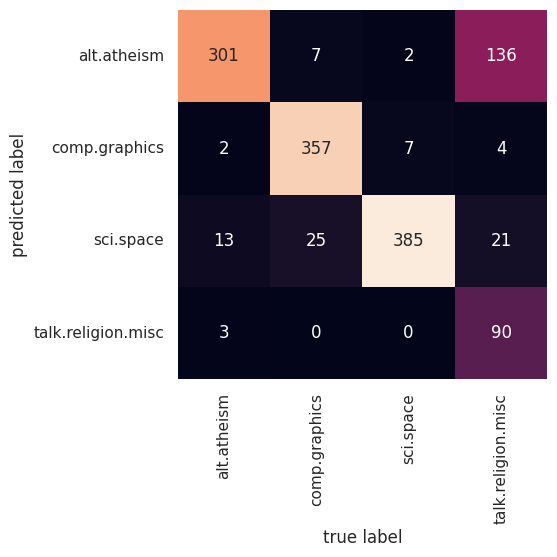

In [9]:
#We will plot a confusion matrix to see prediction accuracy
#The model separate space from religiom but failed to separate atheism from religion talk

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [12]:
predict_category("Let's go to mars")

'sci.space'

In [14]:
predict_category("Let's discuss islam")

'alt.atheism'

In [16]:
predict_category('Screen size')

'comp.graphics'